### Complete EDA of Titanic dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Imports

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
# paramets matplotlib

plt.rcParams['figure.figsize'] = [6, 3]
plt.rcParams['figure.dpi'] = 80

### Load dataset

In [4]:
titanic = sns.load_dataset('titanic')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
cols = titanic.columns
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
plt.style.use('ggplot')

In [9]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

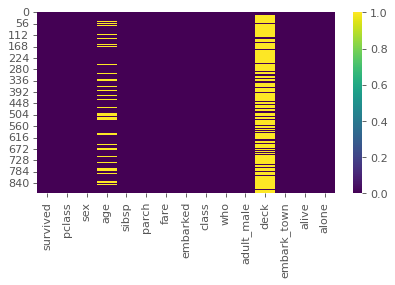

In [11]:
sns.heatmap(titanic.isnull(), 
            cmap ='viridis',
            cbar = True);

In [12]:
corrmat = titanic.corr()
corrmat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


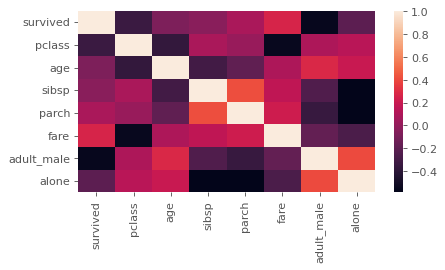

In [13]:
sns.heatmap(corrmat);

### Univariate Analysis

In [14]:
print(list(cols))

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


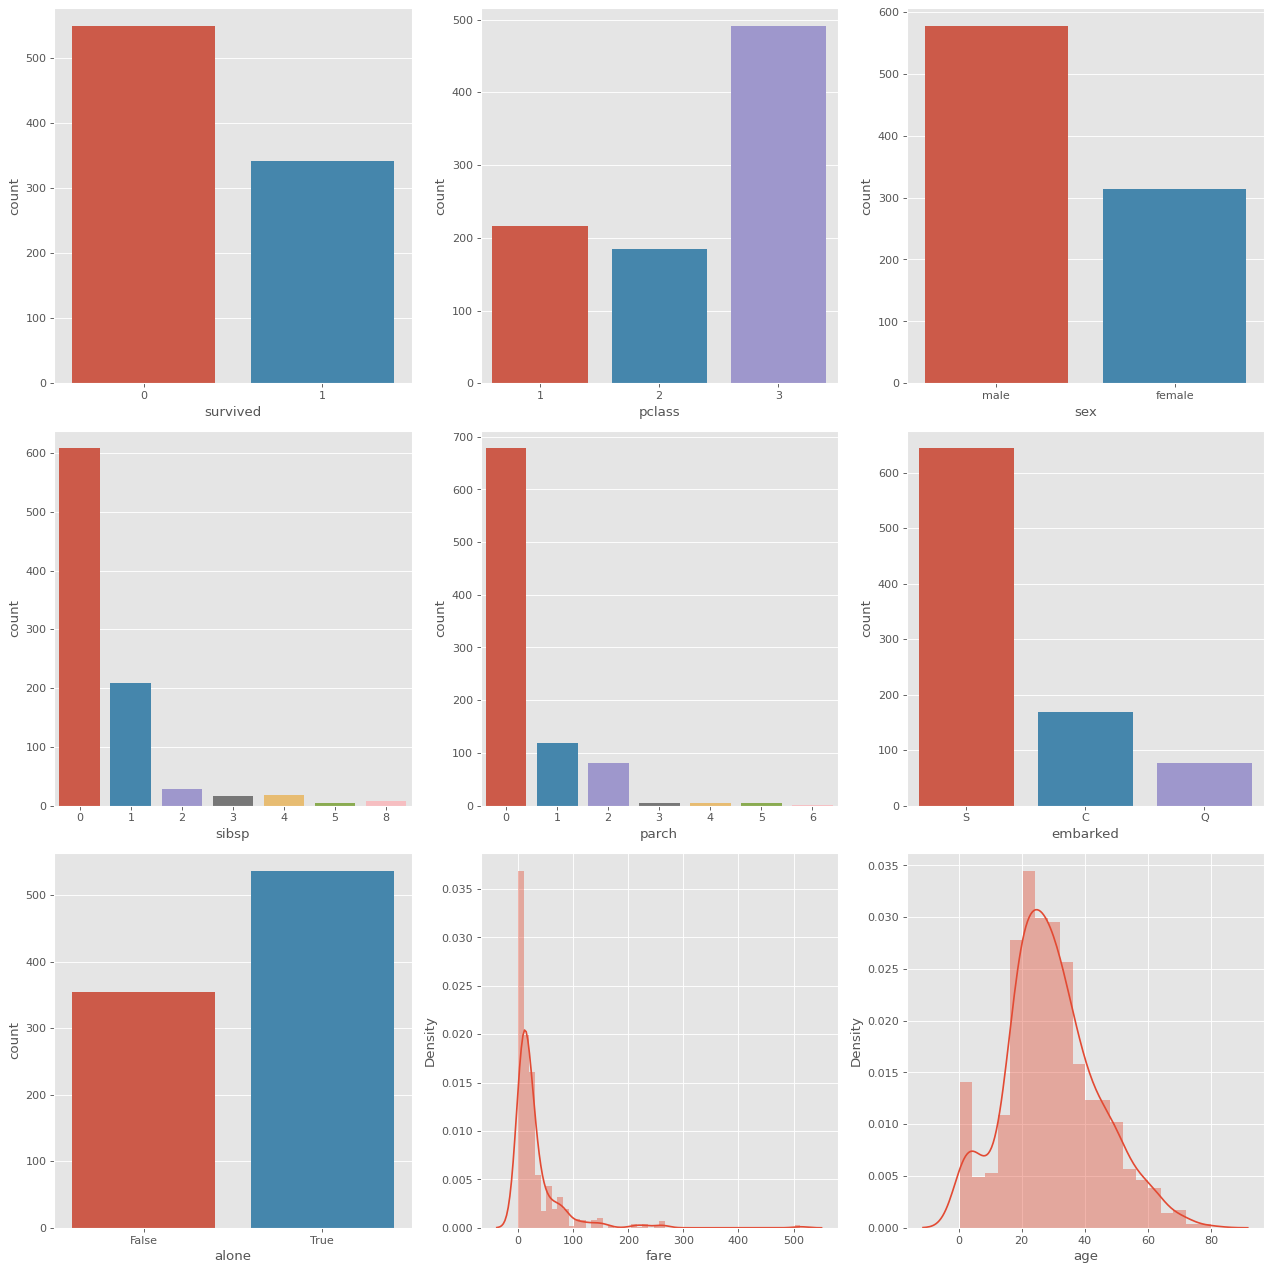

In [15]:
fig, ax = plt.subplots(3,                     # columns
                       3,                     # rows
                       figsize = (16, 16))    # size

sns.countplot('survived', 
              data = titanic,
              ax = ax[0][0])
sns.countplot('pclass', 
              data = titanic,
              ax = ax[0][1])
sns.countplot('sex', 
              data = titanic,
              ax = ax[0][2])
sns.countplot('sibsp', 
              data = titanic,
              ax = ax[1][0])
sns.countplot('parch', 
              data = titanic,
              ax = ax[1][1])
sns.countplot('embarked', 
              data = titanic,
              ax = ax[1][2])
sns.countplot('alone', 
              data = titanic,
              ax = ax[2][0])

sns.distplot(titanic['fare'],
            kde = True,
            ax = ax[2][1])

sns.distplot(titanic['age'],
            kde = True,
            ax = ax[2][2])

plt.tight_layout();

### Survived

In [16]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

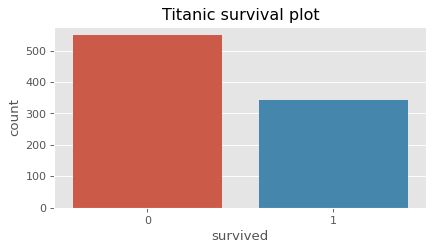

In [17]:
sns.countplot('survived',
              data = titanic)

plt.title('Titanic survival plot')
plt.show();

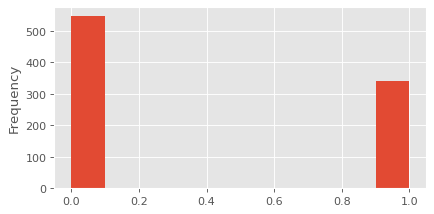

In [18]:
# histplot

titanic['survived'].plot.hist();

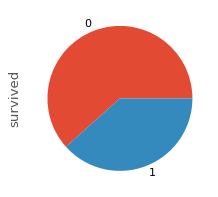

In [19]:
# pie plot

titanic['survived'].value_counts().plot.pie();

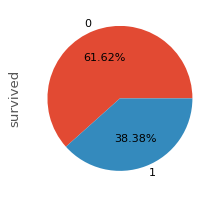

In [20]:
# pie plot %

titanic['survived'].value_counts().plot.pie(autopct = '%1.2f%%');

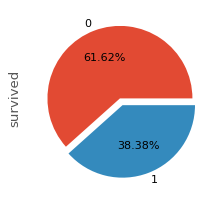

In [21]:
# pie plot explode

explode = [ 0, 0.1]
titanic['survived'].value_counts().plot.pie(explode = explode,
                                            autopct = '%1.2f%%');

### Pclass

In [22]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [23]:
titanic.groupby(['pclass', 'survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

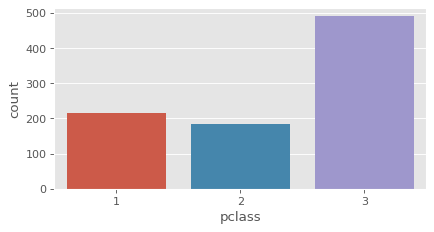

In [24]:
sns.countplot('pclass',
              data = titanic);

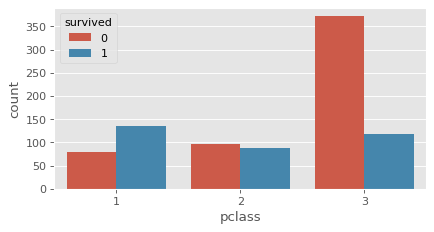

In [25]:
sns.countplot('pclass',
              data = titanic,
              hue = 'survived');

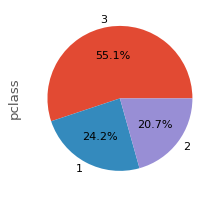

In [26]:
titanic['pclass'].value_counts().plot.pie(autopct = '%1.1f%%');

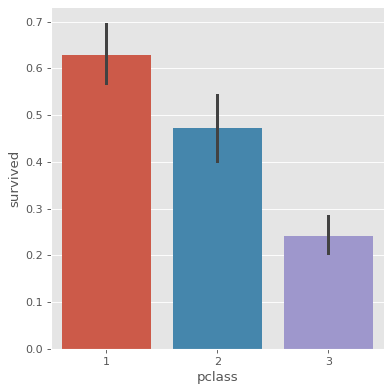

In [27]:
sns.catplot(x = 'pclass',
            y = 'survived',
            kind = 'bar',
            data = titanic);

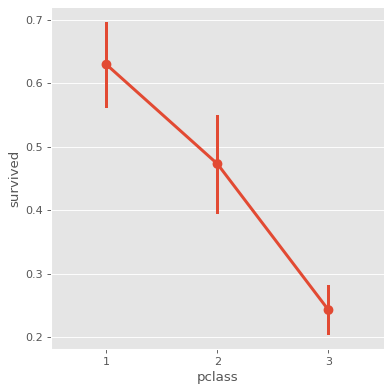

In [28]:
sns.catplot(x = 'pclass',
            y = 'survived',
            kind = 'point',
            data = titanic);

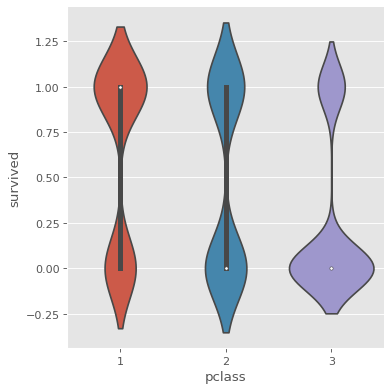

In [29]:
sns.catplot(x = 'pclass',
            y = 'survived',
            kind = 'violin',
            data = titanic);

### Sex

In [30]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [31]:
titanic.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

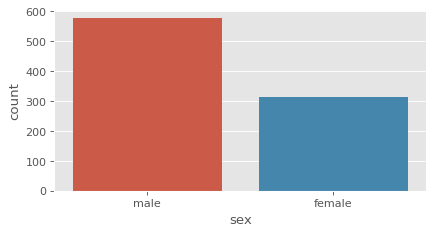

In [32]:
sns.countplot('sex',
              data = titanic);

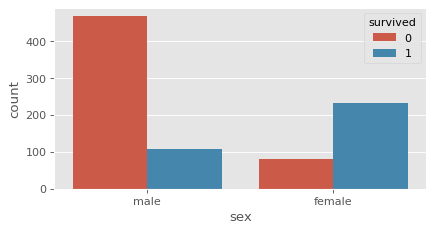

In [33]:
sns.countplot('sex',
              hue ='survived',
              data = titanic);

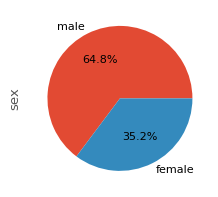

In [34]:
titanic['sex'].value_counts().plot.pie(autopct = '%1.1f%%');

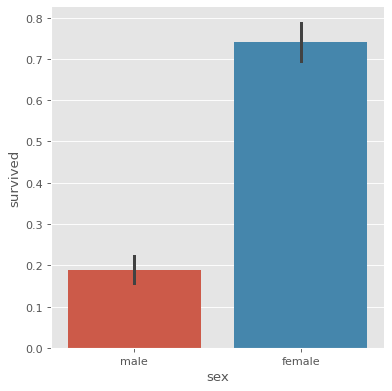

In [35]:
sns.catplot(x= 'sex',
            y = 'survived',
            kind = 'bar',
            data = titanic);

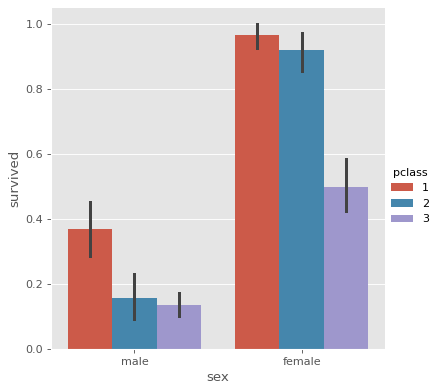

In [36]:
sns.catplot(x= 'sex',
            y = 'survived',
            kind = 'bar',
            hue = 'pclass',
            data = titanic);

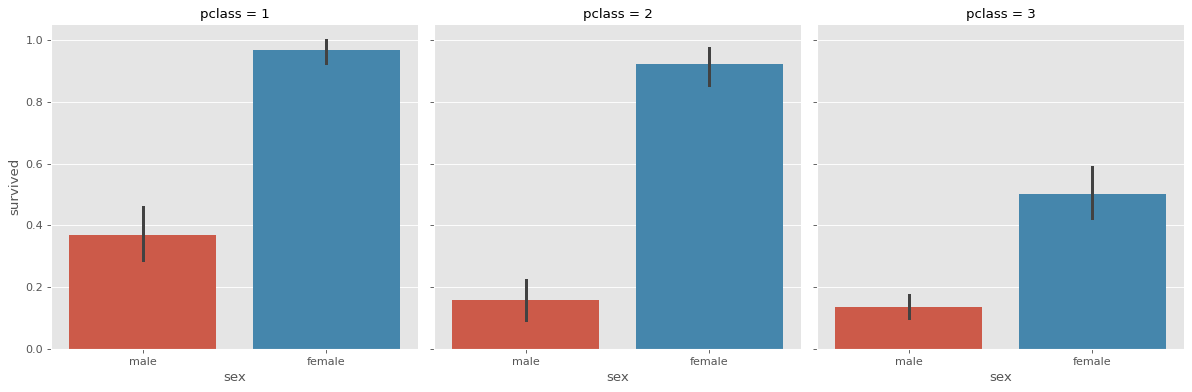

In [37]:
sns.catplot(x= 'sex',
            y = 'survived',
            kind = 'bar',
            col = 'pclass',
            data = titanic);

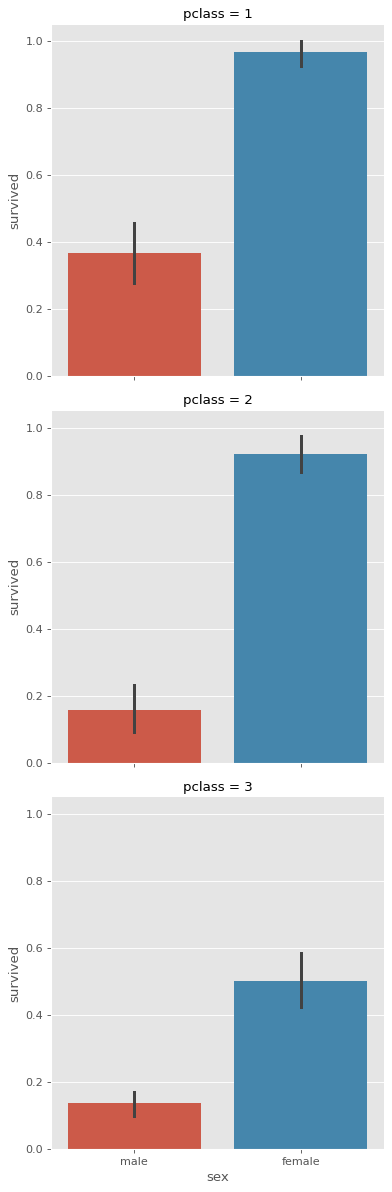

In [39]:
sns.catplot(x= 'sex',
            y = 'survived',
            kind = 'bar',
            row = 'pclass',
            data = titanic);

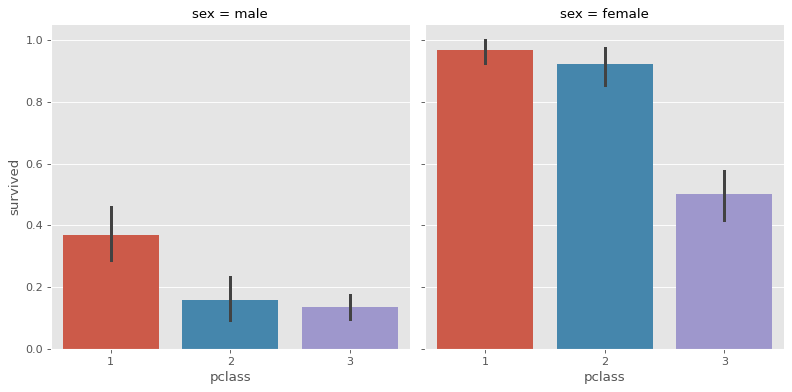

In [40]:
sns.catplot(x= 'pclass',
            y = 'survived',
            kind = 'bar',
            col = 'sex',
            data = titanic);

In [38]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

Author: Caique Miranda

Github username: caiquemiranda

pandas    : 1.4.3
seaborn   : 0.11.2
numpy     : 1.23.0
sys       : 3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]
matplotlib: 3.5.2



### End.